# Simple image recognition algorithm 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset

%matplotlib inline

In [27]:
#loading the data
X_train, y_train, X_test, y_test, classes=load_dataset() 

#### Example of a picture:

y =  [0]


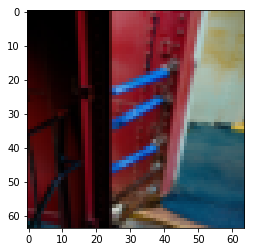

In [29]:
image_number=45
plt.imshow(X_train[image_number])
print('y = ', y_train[:,image_number])

## matrix/vector dimensions!!!! 

In [19]:
y_train.shape

(1, 209)

In [21]:
X_train.shape

(209, 64, 64, 3)

In [30]:
train_examples=X_train.shape[0]
test_examples=X_test.shape[0]
pixel1=X_train.shape[1]
pixel2=X_train.shape[2]

print('Number of training examples: {}'.format(train_examples))
print('Number of test examples: {}'.format(test_examples))
print('Height and width of images: {0} x {1} pixels '.format(pixel1, pixel2) )

Number of training examples: 209
Number of test examples: 50
Height and width of images: 64 x 64 pixels 


### Flatten image

In [32]:
X_train_flattened=X_train.reshape(X_train.shape[0],-1).T
X_test_flattened=X_test.reshape(X_test.shape[0], -1).T

print('Shape of X_train_flattend:\t{}\nShape of X_test_flattend:\t{}'.format(X_train_flattened.shape, X_test_flattened.shape))

Shape of X_train_flattend:	(12288, 209)
Shape of X_test_flattend:	(12288, 50)


### Center and standardize the dataset 

commonly = substract the mean of the whole numpy array from each example, and then divide each example by the standard deviation of the whole numpy array<br>
for images: just divide every row by the maximum value of a pixel channel (255)   

In [58]:
X_train=X_train_flattened/255
X_test=X_test_flattened/255

### Algorithm 

For one example $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

The cost is then computed by summing over all training examples:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{6}$$


#### Steps:
1. Define model structure <br>
2. Initialize parameters<br>
3. Loop: <br>
a) Calculate current loss (forward propagation) <br>
b) Calculate current gradient (backward propagation)<br>
c) Update parameters (gradient descent) 


#### Functions: 

In [36]:
def sigmoid(z):
    """
    argument: z (a scalar or numpy array)
    return: s (sigmoid(z))
    """
    s = 1/(1+np.exp(-z))   
    return s

#### Initializing parameters 
Here: simple, just zeros

In [37]:
def initialize_with_zeros(dim):
    """
    create a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    """
    
    w = np.zeros((dim,1))
    b = 0

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [50]:
#test:
dim=3
w,b=initialize_with_zeros(dim)
print ('w= ', w,'\nb= ', b)

w=  [[0.]
 [0.]
 [0.]] 
b=  0


### Forward propagation / backward propagation

In [43]:
def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation

    arguments:
    w (weights, size (px * px * 3, 1))
    b (bias, a scalar)
    X (data, size (px * px * 3, number of examples))
    Y (true "label" vector (size (1, number of examples))

    return:
    cost 
    dw (gradient of the loss with respect to w)
    db (gradient of the loss with respect to b)
    """
    
    m = X.shape[1]
    A = sigmoid(np.dot(w.T,X)+b)                                     # compute activation
    cost = (-1/m)*np.sum(Y*np.log(A)+((1-Y)*np.log(1-A)), axis=1, keepdims=True)                                 # compute cost

    dw = 1/m*np.dot(X, (A-Y).T)
    db = 1/m*np.sum(A-Y)
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw, "db": db}
    
    return grads, cost

In [52]:
# test
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
print ('dw = {}'.format(grads['dw']))
print ('db = {}'.format(grads['db']))
print ('cost = {}'.format(cost))

dw = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost = 5.801545319394553


### Update the parameters (optimization) 

In [45]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    """
    Optimize w and b (using gradient descent)
    
    arguments:
    w - weights
    b - bias
    X - training data
    Y - true labels
    num_iterations - number of iterations of the optimization loop
    learning_rate - learning rate
    
    returns:
    params - dictionary of weights w and bias b
    grads - dictionary of gradients of the weights and bias with respect to the cost function
    costs - list of all the costs computed during the optimization (used to plot the learning curve)
    """
    
    costs = []
    
    for i in range(num_iterations):
        
        grads, cost = propagate(w, b, X, Y)

        dw = grads["dw"]
        db = grads["db"]
        
        # update weights and bias
        w = w-learning_rate*dw
        b = b-learning_rate*db
        
        # Record the costs each 100 iterations
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 iterations
        if print_cost and i % 100 == 0:
            print ('ost after iteration {0: {1}'.format(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [53]:
# test
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, 
                                learning_rate = 0.009, print_cost = False)

print('w ={0}\nb={1}\ndw={2}\ndb={3}'.format(params['w'], params['b'],
                                                    grads['dw'], grads['db']))


w =[[0.19033591]
 [0.12259159]]
b=1.9253598300845747
dw=[[0.67752042]
 [1.41625495]]
db=0.21919450454067657


### Predict 

In [48]:
def predict(w, b, X):
    '''
    Predicts whether the image shows a cat (1) or a non-cat (0)
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector A (the probabilities) 
    A = sigmoid(np.dot(w.T, X)+b)
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions (0 or 1)
        Y_prediction[0,i]=np.where(A[0,i]>0.5,1,0)
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [54]:
# test
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ('predictions = {}'.format(predict(w, b, X)))

predictions = [[1. 1. 0.]]


### Wraping up

In [55]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    logistic regression model using the  previously  implemented functions
    
    arguments:
    X_train - training set
    Y_train - training labels
    X_test - test set
    Y_test - test labels
    num_iterations - hyperparameter, number of iterations to optimize the parameters
    learning_rate - hyperparameter,  learning rate 
    print_cost - (boolean) - whether print the cost every 100 iterations
        returns:
    d -- dictionary of information about the model
    """
    
    # initialize parameters
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set 
    Y_prediction_test = predict(w,b,X_test)
    Y_prediction_train = predict(w,b,X_train)

    # Print train/test accuracy
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [59]:
d = model(X_train, y_train, X_test, y_test, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


Highly overfitted.
Few examples, shallow net (1 layer with 1 node), no regularized, logistic regression as linear classifier etc.


View the images and see the prediction:

predicted: 0


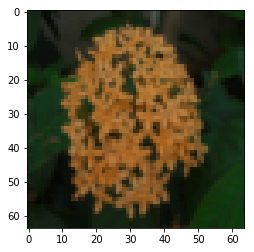

In [75]:
index=43
plt.imshow(X_test[:,index].reshape(pixel1, pixel1, 3))
print('predicted: {}'.format(y_test[0,index]))

#### Plot the learning curve 

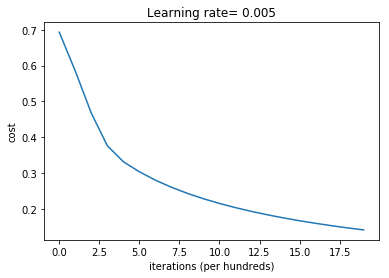

In [76]:
costs=np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title('Learning rate= {}'.format(d['learning_rate']))
plt.show()

## Analysis 

#### learning rate 

learning rate:  0.01
train accuracy: 99.52153110047847 %
test accuracy: 68.0 %
learning rate:  0.001
train accuracy: 88.99521531100478 %
test accuracy: 64.0 %
learning rate:  0.0001
train accuracy: 68.42105263157895 %
test accuracy: 36.0 %


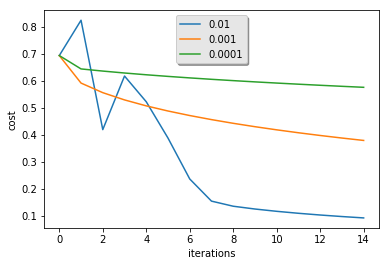

In [81]:
learning_rates=[0.01, 0.001, 0.0001]
models={}

for i in learning_rates:
    print('learning rate: ', i)
    models[str(i)]=model(X_train, y_train, X_test, y_test, num_iterations=1500, 
                         learning_rate=i)
    
for i in learning_rates:
     plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations')

legend=plt.legend(loc='upper center', shadow=True)
frame=legend.get_frame()
frame.set_facecolor('0.90')
plt.show()